<a href="https://colab.research.google.com/github/SumitKKumawat/Extensive-Vision-AI/blob/A3/Assignment%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
#from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Convolution2D, MaxPooling2D, BatchNormalization, SeparableConv2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


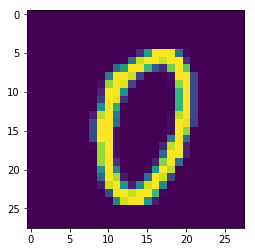

In [10]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1000])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [13]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [15]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32,3,3, activation ='relu', input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(Convolution2D(32,3, activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(16,3,3, activation ='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(16,3,3,activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(10, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(10, 4))


model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if sys.path[0] == '':


In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        4624      
_________________________________________________________________
batch_normalization_3 (Batch (None, 10, 10, 16)        64        
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [19]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=30, verbose=1, validation_data=(X_test,Y_test))

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 256s 4ms/step - loss: 0.2023 - acc: 0.9434 - val_loss: 0.0572 - val_acc: 0.9816
Epoch 2/30
60000/60000 [==============================] - 255s 4ms/step - loss: 0.0520 - acc: 0.9842 - val_loss: 0.0456 - val_acc: 0.9854
Epoch 3/30
60000/60000 [==============================] - 255s 4ms/step - loss: 0.0377 - acc: 0.9882 - val_loss: 0.0355 - val_acc: 0.9877
Epoch 4/30
60000/60000 [==============================] - 255s 4ms/step - loss: 0.0310 - acc: 0.9900 - val_loss: 0.0516 - val_acc: 0.9836
Epoch 5/30
60000/60000 [==============================] - 256s 4ms/step - loss: 0.0264 - acc: 0.9915 - val_loss: 0.0349 - val_acc: 0.9885
Epoch 6/30
60000/60000 [==============================] - 255s 4ms/step - loss: 0.0222 - acc: 0.9927 - val_loss: 0.0355 - val_acc: 0.9889
Epoch 7/30
60000/60000 [==============================] - 256s 4ms/step - loss: 0.0191 - acc: 0.9938 - val_loss: 0.0249 - 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.64337871e-05 8.14433497e-06 9.81452195e-06 4.43942081e-05
  4.98607733e-06 9.41561757e-06 2.47275548e-05 9.99861956e-01
  9.45542615e-06 1.06713069e-05]
 [5.81077018e-07 5.75753312e-09 9.99983430e-01 5.07094846e-08
  1.32384446e-06 2.88598532e-08 1.31403785e-05 1.50189223e-07
  5.00237451e-09 1.34164065e-06]
 [5.64504126e-06 9.99957085e-01 5.24588950e-06 2.66573829e-06
  1.13402939e-06 3.39046528e-06 6.48136165e-06 8.19832894e-06
  7.40691519e-07 9.50729827e-06]
 [9.99960542e-01 7.57199405e-06 7.04627337e-06 1.98415955e-06
  2.45649602e-07 1.29821117e-07 2.13640560e-05 4.65582559e-07
  1.40823019e-07 6.17129103e-07]
 [2.48672609e-06 2.51020305e-04 1.66826896e-06 6.27358604e-05
  9.99450147e-01 3.14475910e-05 1.12133850e-04 3.30241983e-06
  9.29421049e-07 8.40920984e-05]
 [4.62395610e-06 9.99985576e-01 9.90259878e-07 3.39092537e-07
  1.36329015e-06 1.87978259e-07 1.13134161e-06 2.88454703e-06
  7.47881700e-07 2.12860573e-06]
 [1.10351062e-09 1.02639547e-06 4.83843223e-07 1.07084519e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

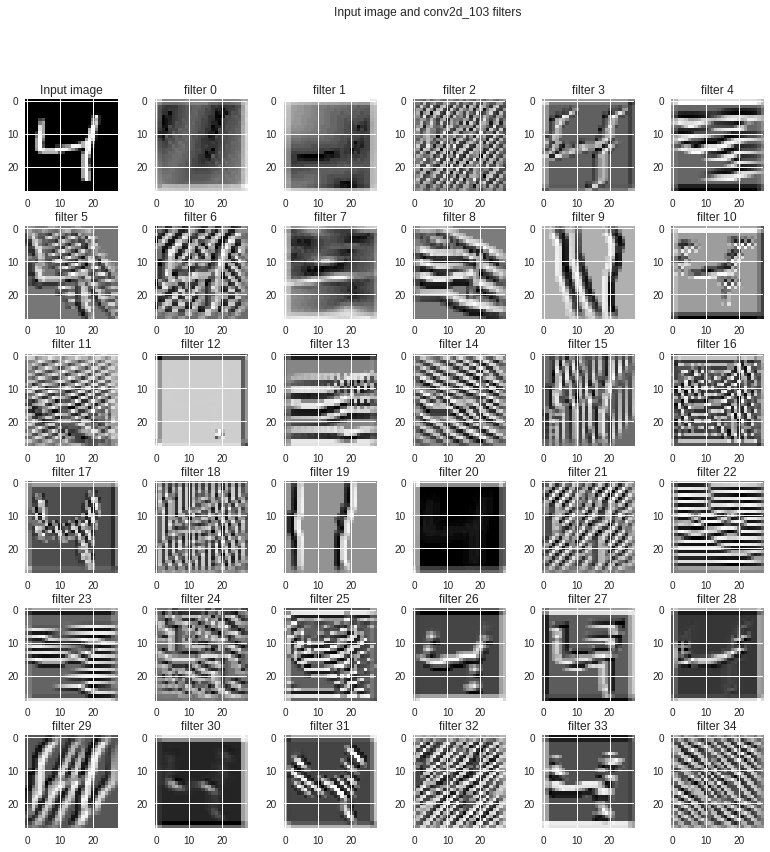

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_103'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()